In [52]:
import clean, residual, run
import numpy as np
import matplotlib.pylab as plt
import re
import csv
from tables import open_file
from statistics import median, mode
from scipy.optimize import curve_fit, minimize
from math import acos, degrees, log
from matplotlib.colors import LogNorm

In [59]:
import imp
imp.reload(residual)
imp.reload(clean)
imp.reload(run)

<module 'run' from '/Users/MatthewMan/Desktop/UofA/Attenuation, Absorption, & Scattering/Analysis/run.py'>

# ---------------------------------------------------
# sDOM5 MINOS 20V

In [60]:
filename = '20190313_170929_UTC_SDOM5_FLASH_MINOS1_P2_orange_both_2500Hz_20V_30s_19072170939.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 0.0


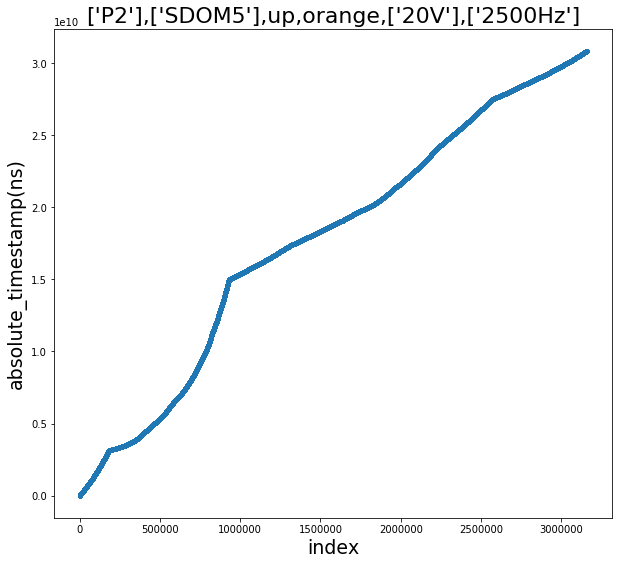

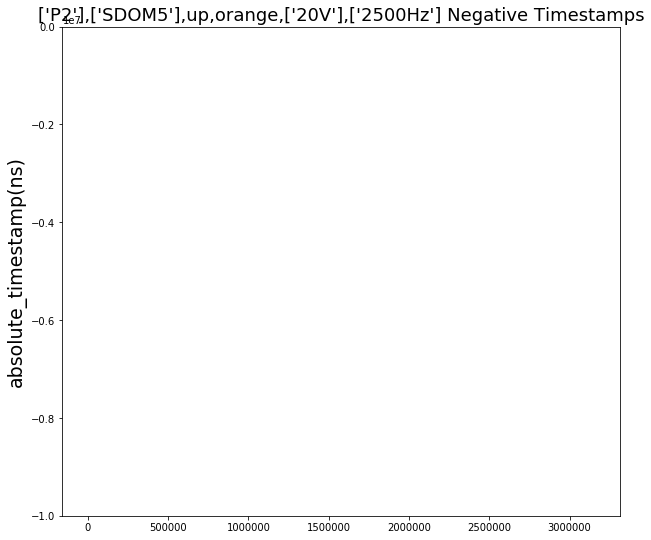

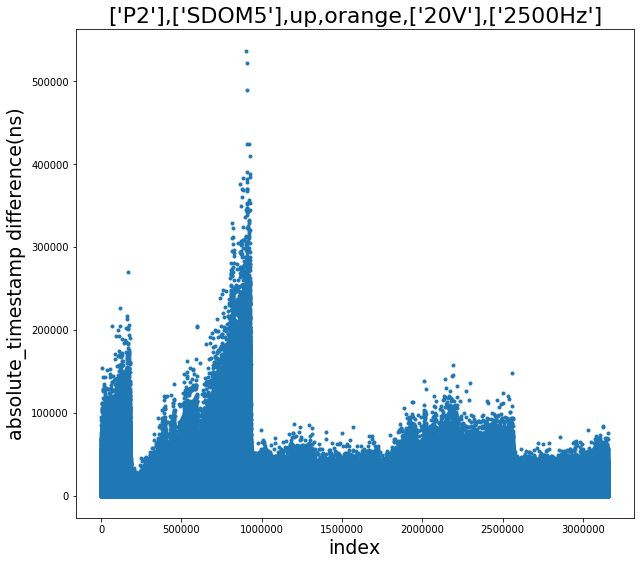

[]


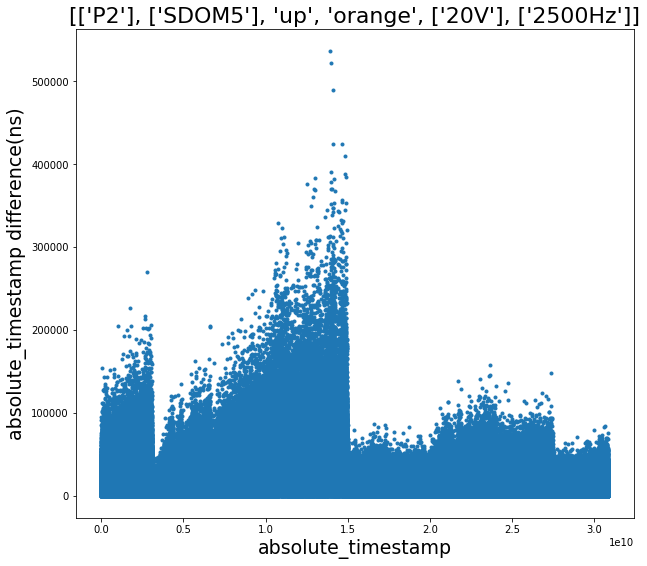

0.10988516413997348


In [61]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = a.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


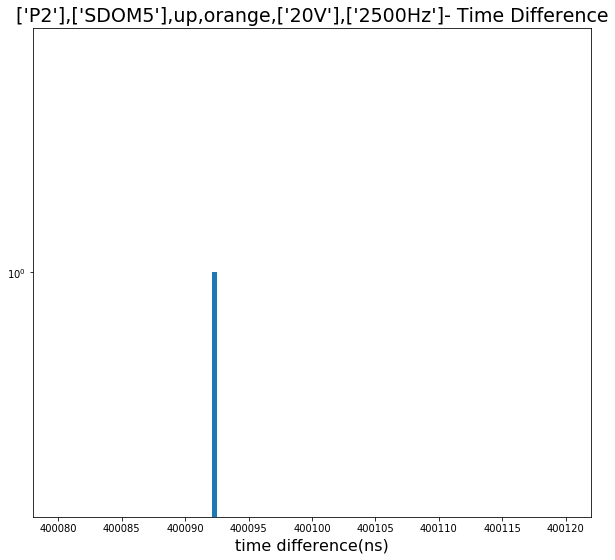

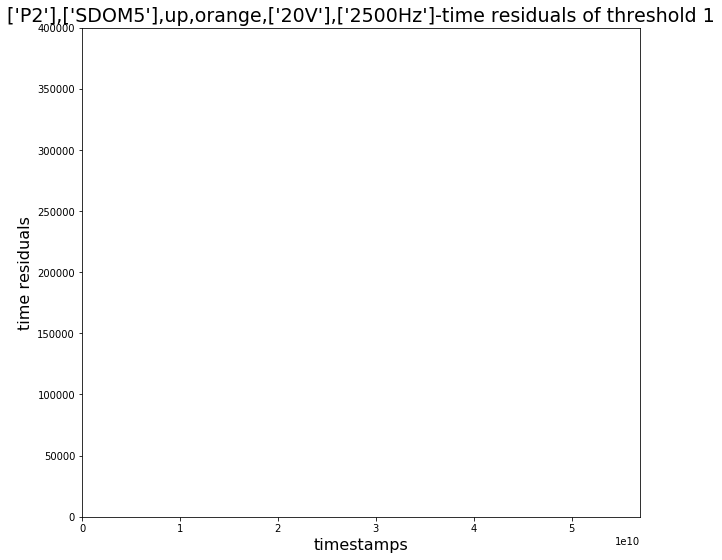

In [62]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

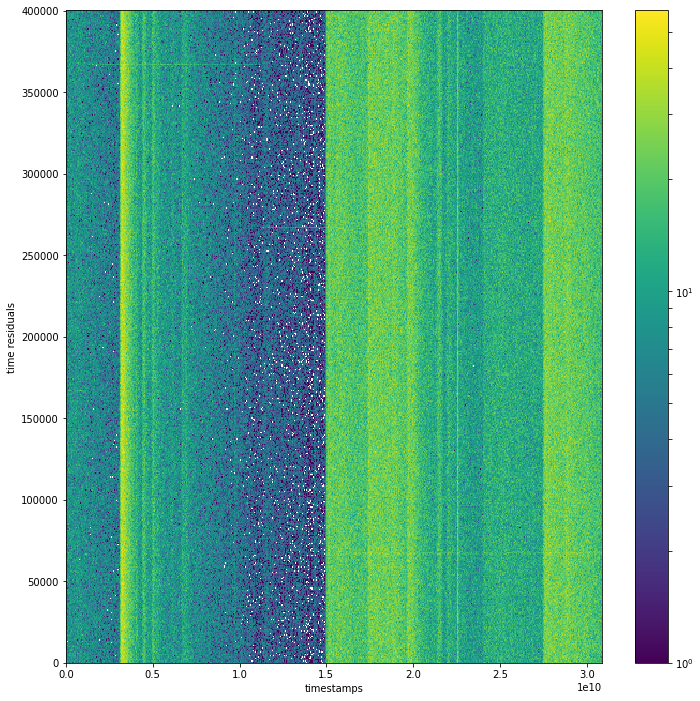

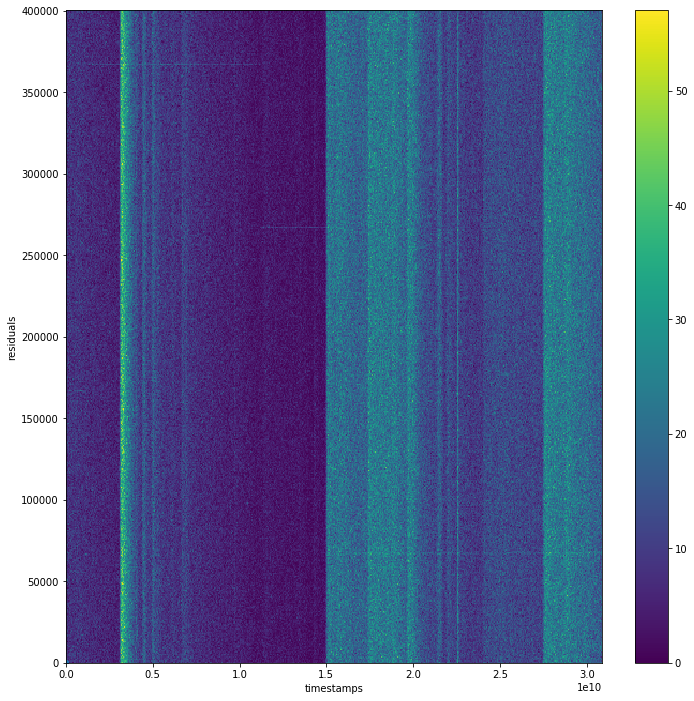

In [72]:
gaus_peak = 400100.716138489 #r1.GetGausPeak([1.7e10,3e10]) #400100.71966755047
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

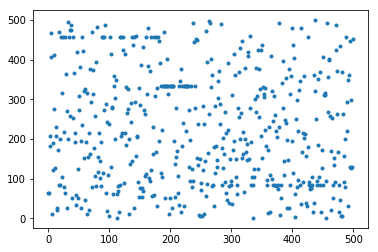

In [15]:
plt.plot(POCAM_bins, '.')

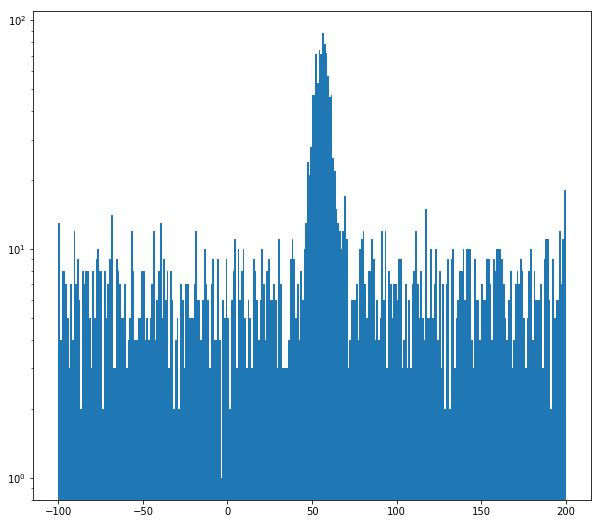

In [73]:
## POCAM signal (plot by eye)

#gaus_peak = 400100.72000000003 #400100.7156722718

time_window1 = (abs_elim_3>0.2e10) & (abs_elim_3<1.1e10)
time_window2 = (abs_elim_3>1.7e10)
#time_window3 = abs_elim_3>5.7e10
#time_window4 = (abs_elim_3>1.8e10) & (abs_elim_3<4.25e10)

my_data_all = np.array([])
weights_all = np.array([])

my_slice = (abs_elim_3+rising_1_elim_3)[time_window1] 
weights = r1.weights[time_window1]
my_res = (my_slice%gaus_peak) - 223260 - 145000+1000+100
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window2]
weights = r1.weights[time_window2]
my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15+250000+6700-25+3
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)

#my_slice = (abs_elim_3+rising_1_elim_3)[time_window3]
#weights = r1.weights[time_window3]
#my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15-123
#my_data_all = np.append(my_data_all, my_res)
#weights_all = np.append(weights_all,weights)

#my_slice = (abs_elim_3+rising_1_elim_3)[time_window4]
#weights = r1.weights[time_window4]
#my_res = (my_slice%gaus_peak) -100000+89-500-15-123
#my_data_all = np.append(my_data_all, my_res)
#weights_all = np.append(weights_all,weights)

fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_data_all,bins=300,log=True, weights=weights_all, range=(-100,200))
#ax.axvline(color='k')

# save to csv
path = 'Data/MINOS1/orange/Measured_arrival_times/'
filename = "['P2'],['SDOM5'],up,orange,['20V'],['2500Hz'].csv"
#with open(path+filename, 'w') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(bins[:-1])
#    writer.writerow(n)
#csvfile.close()

#time_correction_4 = (1.6e10 + (5.0-4.7)*1e10 + (abs_elim_3[-1]-5.7e10))/(abs_elim_3[-1]-abs_elim_3[0])
#print(time_correction_4)

# ---------------------------------------------------
# sDOM5 MINOS 18V

In [37]:
filename = '20190313_164750_UTC_SDOM5_FLASH_MINOS1_P2_orange_both_2500Hz_18V_30s_19072164800.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 0.8190202129658467


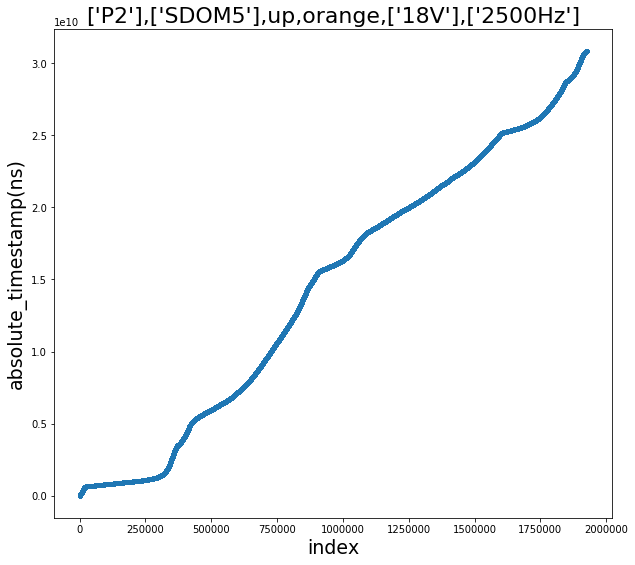

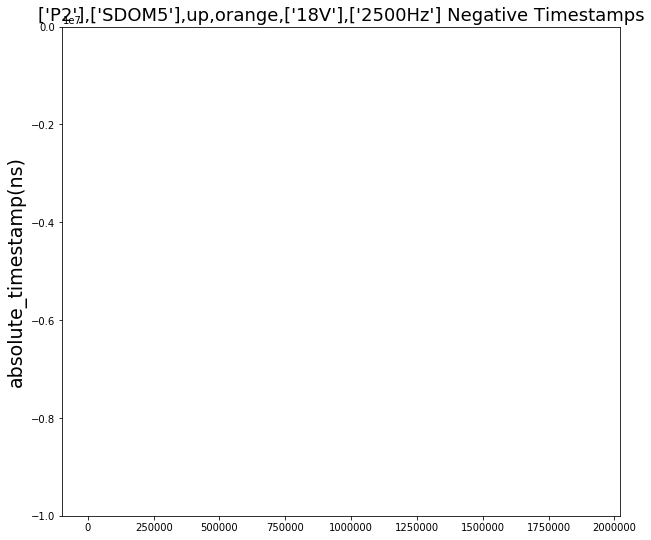

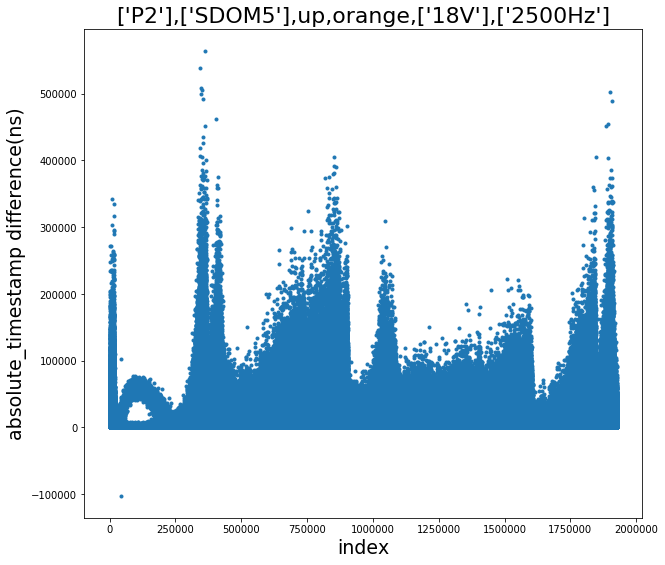

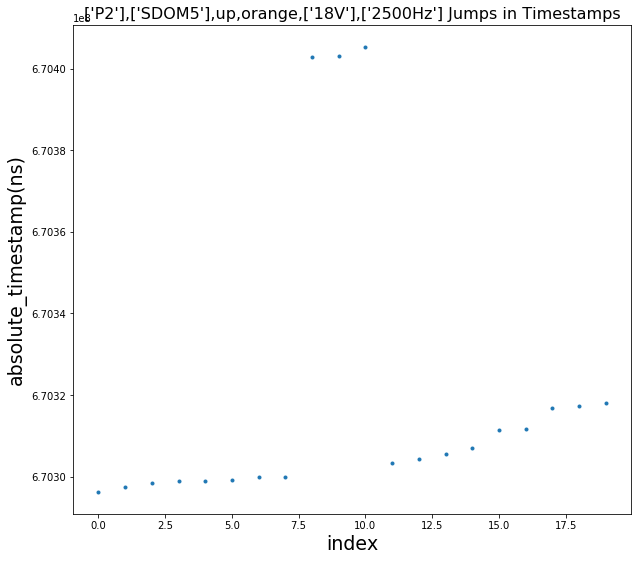

[42377. 42378. 42379.]


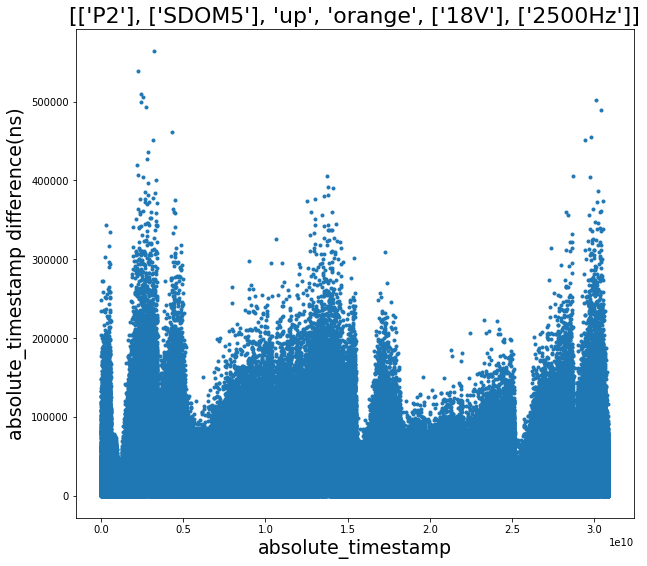

0.11520264389288284


In [38]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT,sub_time_elim_3,sub_id_elim_3) = a.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


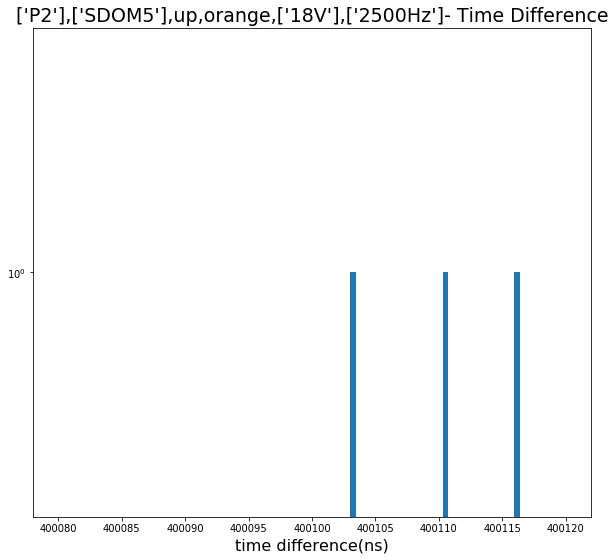

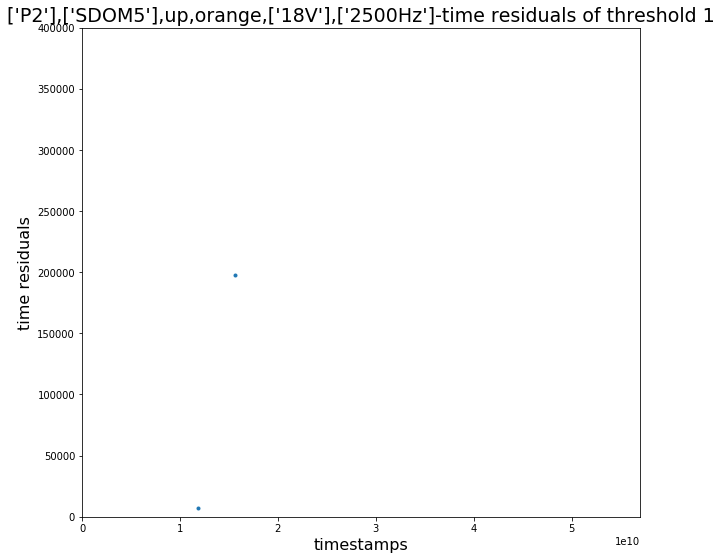

In [39]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400115,
             0.0e10,5.7e10,0, 400000, file_path, values, POCAM_num, rising_0_elim_3,falling_0_elim_3)

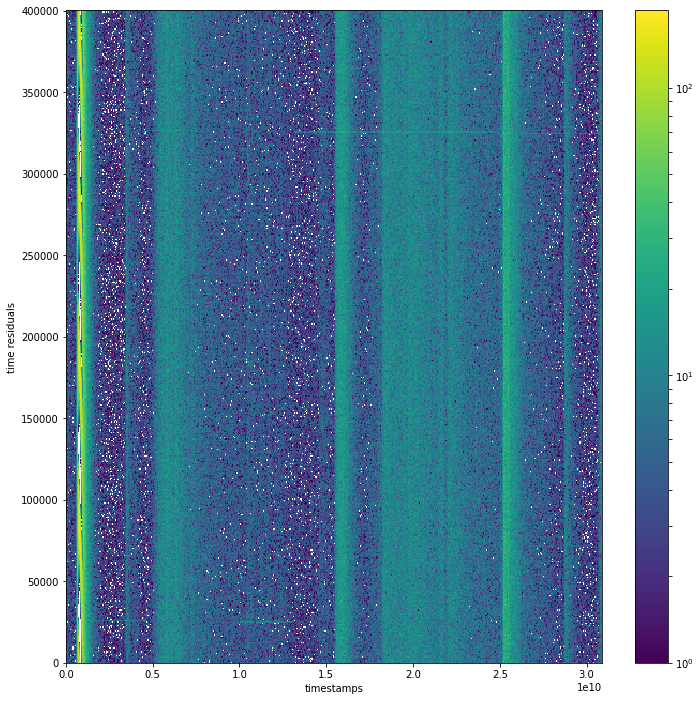

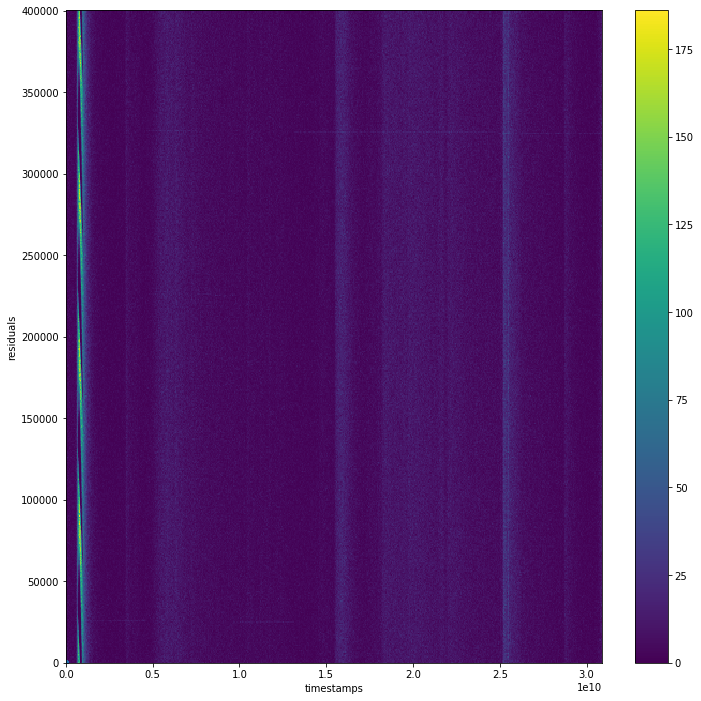

In [40]:
gaus_peak = 400100.71966755047
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

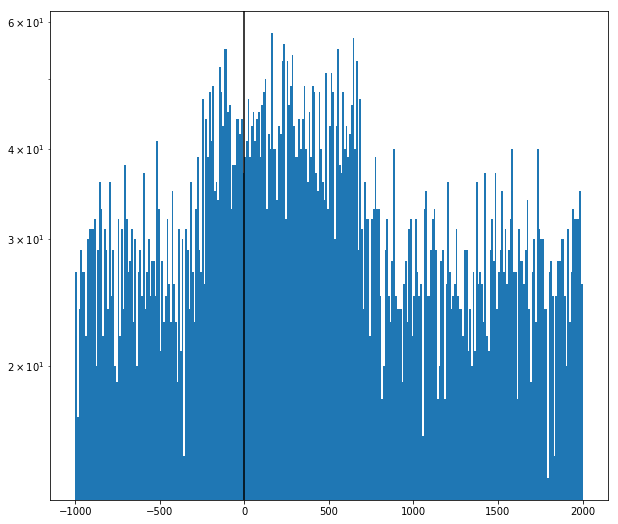

In [51]:
## POCAM signal (plot by eye)

gaus_peak = 400100.71966755047 #400100.7156722718

time_window1 = (abs_elim_3>0.1e10) & (abs_elim_3<.5e10)
time_window2 = (abs_elim_3>.5e10) & (abs_elim_3<.75e10)
time_window3 = (abs_elim_3>1e10) & (abs_elim_3<1.3e10)
time_window4 = (abs_elim_3>1.3e10)

my_data_all = np.array([])
weights_all = np.array([])

my_slice = (abs_elim_3+rising_1_elim_3)[time_window1] 
weights = r1.weights[time_window1]
my_res = (my_slice%gaus_peak) - 223260 - 145000+2500-100+340000
#my_data_all = np.append(my_data_all, my_res)
#weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window2]
weights = r1.weights[time_window2]
my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15+250000+6700-25+3
#my_data_all = np.append(my_data_all, my_res)
#weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window3]
weights = r1.weights[time_window3]
my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15-123
#my_data_all = np.append(my_data_all, my_res)
#weights_all = np.append(weights_all,weights)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window4]
weights = r1.weights[time_window4]
my_res = (my_slice%gaus_peak) - 223260-100000+89-500-15-123-1000
my_data_all = np.append(my_data_all, my_res)
weights_all = np.append(weights_all,weights)


fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_data_all,bins=300,log=True, weights=weights_all, range=(-1000,2000))
ax.axvline(color='k')

# save to csv
path = 'Data/MINOS1/orange/Measured_arrival_times/'
filename = "['P2'],['SDOM5'],up,orange,['18V'],['2500Hz'].csv"
#with open(path+filename, 'w') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(bins[:-1])
#    writer.writerow(n)
#csvfile.close()

#time_correction_4 = (1.6e10 + (5.0-4.7)*1e10 + (abs_elim_3[-1]-5.7e10))/(abs_elim_3[-1]-abs_elim_3[0])
#print(time_correction_4)

# ---------------------------------------------------
# sDOM1 TRISMEGISTOS 20V